In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

In [3]:
x,y=make_circles(n_samples=1000,noise=0.12,random_state=10)

In [33]:
x

array([[-0.24675595, -0.54842099],
       [ 0.57698458, -0.37199026],
       [ 0.84029648,  0.42686333],
       ...,
       [ 0.89065963, -0.09945381],
       [ 0.08842059,  0.81002791],
       [-1.25002808, -0.19091165]])

In [34]:
y

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,

In [8]:
df=pd.DataFrame(x,columns=['x1','x2'])

<AxesSubplot: xlabel='x1', ylabel='x2'>

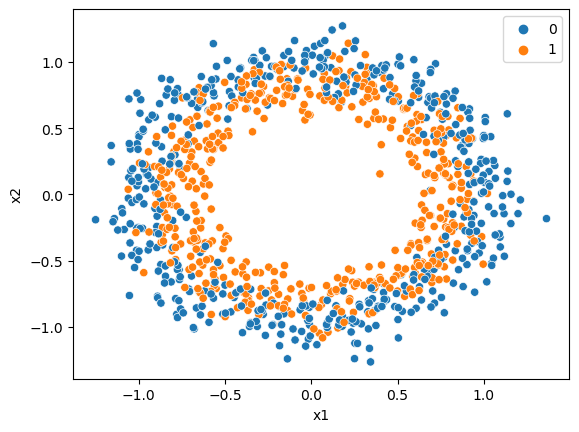

In [9]:
sns.scatterplot(x=df['x1'],y=df['x2'],hue=y)

In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## applying polynomial kernel manually


In [10]:
df['x1_sq']=df['x1']**2
df['x2_sq']=df['x2']**2
df['x1*x2']=df['x1']*df['x2']

In [11]:
df.head()

,x1,x2,x1_sq,x2_sq,x1*x2
0,-0.246756,-0.548421,0.060888,0.300766,0.135326
1,0.576985,-0.371990,0.332911,0.138377,-0.214633
2,0.840296,0.426863,0.706098,0.182212,0.358692
3,-0.474503,0.775951,0.225153,0.602100,-0.368191
4,-0.863676,-0.303216,0.745936,0.091940,0.261880


In [24]:
## lets see the 3-d diagram of the data
import plotly.express as px


In [73]:
fig=px.scatter_3d(df,x=df['x1_sq'],y=df['x2_sq'],z=df['x1*x2'])
fig.show()
plt.show()

In [30]:
X=df[['x1_sq','x2_sq','x1*x2']]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [40]:
x_train.head()

,x1_sq,x2_sq,x1*x2
163,0.130579,0.513837,-0.259030
642,0.013102,0.814245,0.103288
638,0.476864,0.528149,0.501852
264,0.521991,0.298346,-0.394631
536,0.233808,0.496078,0.340569


In [35]:
from sklearn.svm import SVC

In [36]:
svc=SVC(kernel='linear')

In [38]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [41]:
y_pred=svc.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print(accuracy_score(y_test,y_pred))

0.792


## using sklearn

In [61]:
svc_k=SVC(kernel='poly')


In [62]:
svc_k.fit(x_train,y_train)

SVC(kernel='poly')

In [63]:
y_pred=svc_k.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred)

0.796

In [65]:
## rbf
svc_rbf=SVC(kernel="rbf")

In [66]:
svc_rbf.fit(x_train,y_train)

SVC()

In [67]:
y_pred=svc_rbf.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred)

0.776

In [69]:
## sigmoid
svc_rbf=SVC(kernel="sigmoid")

In [70]:
svc_rbf.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [71]:
y_pred=svc_rbf.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred)

0.42